In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook

In [3]:

# -------------------------------------------------------------------------
# Const
# -------------------------------------------------------------------------
nm2m=1852. # 1 nautical mile to meters
kt2ms=nm2m/3600.  # knots to m/s
omega=2*np.pi/(3600.*24.) # angular speed omega=2pi*f(=frequency of earth : 1 cycle per day) 2pi* 1 / day in seconds
rhoa=1.15 #air density  Kg/m^3
radius=6378388 #137. # earth's radius according to WGS 84
deg2m=np.pi*radius/180.  # ds on cicle equals ds=r*dth - dth=pi/180
pn=101000.  # Atmospheric pressure [N/m^2] (101KPa - enviromental pressure)

tetaNE=45. #mean angle [degrees] of North Eastern quadrant
tetaNW=135. #        "              North Western
tetaSW=225. #        "              South West
tetaSE=315. #        "              South East

maxR=500.e3  # maximum radius of TC [m] (500Km)

In [4]:
kmin=0  # low limit of parameter k (=xn-.5-> k=0-> x=0.5)
kmax=0.25 # upper limit for k (->xn=.65)  WHY?

dpmin=10.e2  # minimum value of  pressure drop P_central - P_env(=101kPa).
dpmax=200.e2   # maximum value of  pressure drop P_central - P_env(=101kPa).
rvmaxmin=10.e3  # default minimum value of Rmax[m] 

bmin=0.8 # minimum value of holland parameter b
#bmax=2.5
bmax=1.8  # maximum value of holland parameter b
b0=1.2  # initial estimation of holland parameter b

rmax0=20.e3  # intial estimation for radius of maximum wind [m] (20km)
maxR=500.e3  # maximum radius of TC [m] (500Km)

In [5]:
fk=0.92  # coefficient for going from 1m to 10m in velocities

In [6]:
radcols=['64ne', '64se', '64sw', '64nw', '50ne', '50se', '50sw', '50nw',
       '34ne', '34se', '34sw', '34nw']

In [7]:
cols=['w'+ name for name in radcols]

In [8]:
def hvel(r,dph,bh,rmaxh,kh):
    x=0.5+(r-rmaxh)/(maxR-rmaxh)*kh
    return (bh/rhoa*(rmaxh/r)**bh*dph*np.exp(-(rmaxh/r)**bh))**x

In [9]:
rh=np.linspace(0.01,maxR,100)

### read TC data

In [10]:
path='test/'

In [11]:
tc=pd.read_csv(path+'step2.txt',delimiter='\t')

In [12]:
tc

,time,t,hurName,lat,lon,pcenter,penv,rmax,vmax,34ne,...,w64nw,w50ne,w50se,w50sw,w50nw,w34ne,w34se,w34sw,w34nw,vmax0vt
0,0.0,2010-10-29 06:00:00,INVEST,9.0,-53.7,1006,1009,222240.0,15.433333,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.069814
1,6.0,2010-10-29 12:00:00,INVEST,9.8,-55.3,1003,1009,166680.0,18.005556,138900.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,17.394121,0.000000,18.059481,16.718113,18.059481
2,12.0,2010-10-29 18:00:00,TOMAS,10.8,-56.8,998,1009,55560.0,23.150000,166680.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,18.074184,17.313465,18.366306,17.301589,18.366306
3,18.0,2010-10-30 00:00:00,TOMAS,11.9,-57.8,999,1009,55560.0,28.294444,166680.0,...,0.000000,23.106896,0.000000,25.859722,0.000000,18.316167,17.397022,18.525193,17.452947,25.859722
4,24.0,2010-10-30 06:00:00,TOMAS,12.7,-58.9,997,1009,55560.0,30.866667,166680.0,...,0.000000,23.344100,0.000000,25.728973,0.000000,18.496702,17.636008,18.632523,17.383112,25.728973
5,30.0,2010-10-30 12:00:00,TOMAS,13.1,-60.1,993,1009,37040.0,33.438889,222240.0,...,30.031688,24.748161,25.130682,25.443546,24.067929,19.599667,17.745589,18.645319,17.719449,30.031688
6,36.0,2010-10-30 18:00:00,TOMAS,13.3,-61.0,990,1009,37040.0,41.155556,222240.0,...,30.216264,24.889111,24.963993,25.297372,24.185329,19.678071,17.715329,18.630080,17.783646,33.720308
7,42.0,2010-10-31 00:00:00,TOMAS,13.5,-61.7,982,1009,37040.0,43.727778,222240.0,...,30.399362,24.927226,24.798761,25.291917,24.301841,19.727123,17.685447,18.658875,17.847466,36.492381
8,48.0,2010-10-31 06:00:00,TOMAS,13.8,-62.4,983,1009,27780.0,43.727778,222240.0,...,30.297483,25.333873,24.927432,25.512994,24.253146,19.783799,17.750702,18.727010,17.858079,36.023263
9,54.0,2010-10-31 12:00:00,TOMAS,14.0,-63.3,988,1011,27780.0,41.155556,222240.0,...,30.017961,25.320538,25.224808,25.584497,24.095087,19.813501,17.856080,18.784244,17.817282,32.757192


### For one time ... 

In [37]:
it=1

In [38]:
vmax=tc.loc[it].vmax

In [39]:
#
#try:
#    dp=tc.loc[it].dp
#except:
#    pass

In [40]:
R=tc.ix[it,radcols].values

In [41]:
V=tc.ix[it,cols].values

In [42]:
vmax0vt = tc.vmax0vt.values[it]

In [43]:
time = tc.time.values[it]

In [44]:
sinfi = tc.sinfi.values[it]

In [45]:
lat=tc.lat.values[it]

In [46]:
w = R > 0.

In [47]:
R = R[w].astype(float)

In [48]:
V = V[w].astype(float)

In [49]:
R,V

(array([ 138900.,  138900.,   74080.]),
 array([ 17.39412117,  18.05948095,  16.71811325]))

## Calculating using Monte Carlo

In [50]:
nb=10000  #size of random numbers used

In [51]:
npmin=2 # minimum number of velocities in order to...

npv=np.size(V)

In [52]:
if (npv>npmin):
     K=kmin+(kmax-kmin)*np.random.rand(nb)
elif(done):
     K = np.ones(nb)*ktot[t-1] # previous time step
else:
     K = np.ones(nb)*kmin

In [53]:
#  DP
DP=dpmin*(dpmax/dpmin)**np.random.rand(nb)

#  Rmax
rvmaxmin_=np.min([rvmaxmin,np.min(R)*0.5])  # update the minimum  value for Rmax with the R.min/2 from input
RMAX=rvmaxmin_*(np.min(R)*0.99/rvmaxmin_)**np.random.rand(nb) # range  min(10000,Rmin/2)<Rmax<.99*Rmin (scaled)

In [54]:
#--------------------------------------------------
# calculate vmax1 = v max0k -vt - Coriolis effect (function of RMAX)
#--------------------------------------------------
deltalatvmax=RMAX/deg2m*sinfi  # for each Rmax we compute the lat deviation for the velocity
latvmax=lat+deltalatvmax

fvmax=2*omega*np.abs(np.sin(np.radians(latvmax))) # Coriolis coef f

fvmax2=RMAX*fvmax/2
vmax1=((vmax0vt+fvmax2)**2-fvmax2**2)**0.5
mask=vmax1<np.max(V)
np.copyto(vmax1,np.max(V),where=mask)

#----------------------------------
# use the random values of vmax,dp above we compute b (from Holland 2010 - eqs (7))
#----------------------------------

B=(rhoa*np.exp(1)/DP)*vmax1**2


m=(B >= bmin) & ( B <= bmax) & (lat*latvmax > 0)  # mask B that fits all 3 criteria
nb1 = np.sum(m) #number of 'True' values

#  mask arrays accordingly
K=K[m]
DP=DP[m]
RMAX=RMAX[m]
B = B[m]

nval = np.size(V)  # number of V > 0
Vcalc = []
RMS = np.zeros(nb1)

#try:
#        r
#except NameError:
#        pass
#else:
#        r=None

# check values for all V
for i in range(nval):
      try:
        r = R[i]
        ratio=(r-RMAX)/(maxR-RMAX)
        X=0.5 + np.min([np.max(ratio,0),1])*K   #compute x using random k  & Rmax
        Vcalc=np.append(Vcalc,((B/rhoa) * DP* (RMAX/r)**B * np.exp(-(RMAX/r)**B))**X)  # compute & store V
      except: print 'sys.exit()'

for i in range (nb1):
      try:
        RMS[i]=np.sqrt(np.average((Vcalc[i::nb1]-V)**2))  # compute deviation from estimated and given values
      except : print 'sys.exit()'

value=nb1
totvalue=nb

# -------------------------------------------------------------------------
# select final velocities
# -------------------------------------------------------------------------
m=RMS == np.min(RMS)  #find minimum RMS

# select the minimizing quantities
rmse=RMS[m][0]
dpMC=DP[m][0]
bMC=B[m][0]
rmaxMC=RMAX[m][0]
kMC=K[m][0]

vmax1MC = np.sqrt(bMC*dpMC/(rhoa*np.exp(1)))  # compute estimated vmax


# print on screen
var=[rmse,dpMC,bMC,rmaxMC,kMC ,np.max(V),vmax1MC]
varn=['rmse','dp','b','rmax','k','np.max(V)','vmax1']

mcdic={el:val for (el,val) in zip(varn,var)}


In [55]:
mcdic

{'b': 0.83172792083311586,
 'dp': 1262.6018623362168,
 'k': 0.24954767215986656,
 'np.max(V)': 18.059480947600001,
 'rmax': 21683.9396726382,
 'rmse': 0.85574056875639615,
 'vmax1': 18.328532421318425}

## Calculating using Scipy

In [56]:
# p[0] = B
# p[1] = Rmax
# p[2] = k
# p[3] = dp

from scipy.optimize import minimize, fmin_slsqp

def slsqp(R,V,maxR,rho,b,rmax,dp,k,vmax):
        dpmin=10.e2  # minimum value of  pressure drop P_central - P_env(=101kPa).
        dpmax=200.e2   # maximum value of  pressure drop P_central - P_env(=101kPa).
        kmin=0  # low limit of parameter k (=xn-.5-> k=0-> x=0.5)
        kmax=0.15 # upper limit for k (->xn=.65)  WHY?

        def func(p,x):
                 return (p[0]/rho*(p[1]/x)**p[0]*p[3]*np.exp(-(p[1]/x)**p[0]))**(0.5+(x-p[1])/(maxR-p[1])*p[2]) # complete
#                 return (p[0]/rho*(p[1]/x)**p[0]*dp*np.exp(-(p[1]/x)**p[0]))**(0.5+(x-p[1])/(maxR-p[1])*p[2]) # given dp
        def errf(p,x,y):
            return np.sum((func(p,x)-y)**2)

#       def cf(p,x,y):
#           return vmax-func(p,p[1])
        def cf(p,x,y):
                 return p[0]-vmax**2*rho*np.exp(1.)/p[3] # complete
#                 return p[0]-vmax**2*rho*np.exp(1.)/dp # given dp



        p0=[1.2,20000,.15,400.]
#       p0=[1.2,20000,.5]


        bp=[(.8,1.8),(5000,R.min()*.99),(0.,.15),(dpmin,dpmax)]
#        bp=[(.8,2.5),(5000,R.min()*.99),(kmin,kmax)]

        res1 = minimize(errf, p0, args=(R, V), method='L-BFGS-B', bounds=bp, \
                        options={'disp': True, 'maxls': 20, 'iprint': -1, 'gtol': 1e-05, 'eps': 1e-08, 'maxiter': 15000, 'ftol': 2.220446049250313e-09, 'maxcor': 10, 'maxfun': 15000})
        print ('L-BFGS-B', res1.x)
        res2 = minimize(errf, p0, args=(R, V), method='SLSQP', bounds=bp, tol=1e-3, options={'disp': True, 'iprint': 1, 'eps': 1.4901161193847656e-08, 'maxiter': 100, 'ftol': 1e-06})
        print ('SLSQP', res2.x, res2.fun, res2.message)
        res = fmin_slsqp(errf, p0, bounds=bp, args=(R, V),f_ieqcons=cf,acc=1e-5)
        print (res)

        

        print ('Rmax= ', res1.x[1],res2.x[1])
        print ('F(Rmax)= ', cf(res1.x,0.,0.), cf(res2.x,0.,0.))
        return func,res1.x,res2.x, res




In [57]:
fitf2,p2,p3,p4=slsqp(R,V,maxR,rhoa,b0,rvmaxmin,dpmin,kmin,vmax0vt)

('L-BFGS-B', array([  8.00000000e-01,   2.00198454e+04,   1.50000000e-01,
         1.61503372e+03]))
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 4.21128841605
            Iterations: 10
            Function evaluations: 60
            Gradient evaluations: 10
('SLSQP', array([  8.00000000e-01,   2.00034862e+04,   1.50000000e-01,
         1.61568102e+03]), 4.211288416047581, 'Optimization terminated successfully.')
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 4.21136274447
            Iterations: 11
            Function evaluations: 68
            Gradient evaluations: 11
[  8.00000000e-01   2.00031004e+04   1.50000000e-01   1.61562551e+03]
('Rmax= ', 20019.845385712262, 20003.486194847246)
('F(Rmax)= ', 0.1687211243904112, 0.16897403922009635)


In [58]:
idx = [3, 0, 1, 2] # change the order of the variables to match the arguments in hvel()

In [59]:
#idx = [0, 1, 2] # change the order of the variables to match the arguments in hvel()

## plot and compare

<IPython.core.display.Javascript object>


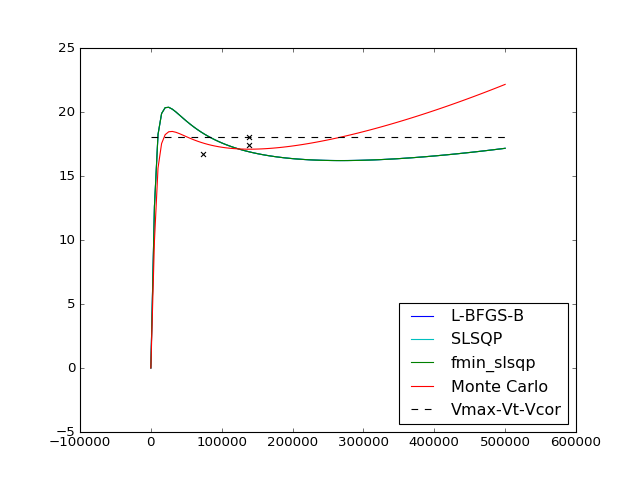

In [60]:
plt.figure()
try:
    plt.plot(rh, hvel(rh, dp, *p2[idx]), 'b-', label='L-BFGS-B')
except:
    plt.plot(rh, hvel(rh, *p2[idx]), 'b-', label='L-BFGS-B')

try:
    plt.plot(rh, hvel(rh, dp,  *p3[idx]), 'c-', label='SLSQP')
except:
    plt.plot(rh, hvel(rh, *p3[idx]), 'c-', label='SLSQP')


try:
    plt.plot(rh, hvel(rh, dp, *p4[idx]), 'g-', label='fmin_slsqp')
except:
    plt.plot(rh, hvel(rh, *p4[idx]), 'g-',  label='fmin_slsqp')


try:
    plt.plot(rh, hvel(rh, dpMC, bMC, rmaxMC, kMC), 'r-', label='Monte Carlo')
except:pass



plt.scatter(R,V,color='k',marker='x',s=20)
plt.plot(rh,np.ones(rh.size)*vmax0vt,'k--', label='Vmax-Vt-Vcor')

plt.legend(loc=0)
plt.show()

In [ ]:
print jj

In [ ]:
# select solution
bh, rmaxh, kh, dph = p4

## Plot profile

In [ ]:
xl=np.linspace(-maxR, maxR,1000)
yl=np.linspace(-maxR, maxR,1000)
q1,q2=np.meshgrid(xl,yl)
vtx=outData.vtrx
vty=outData.vtry

In [ ]:
def pres(r):
    return pn+dph*np.exp(-(rmaxh/r)**bh)

In [ ]:
def hvel2d(l1,l2):
    r=np.sqrt(l1**2+l2**2)
    xh=0.5+(r-rmaxh)/(maxR-rmaxh)*kh
    ur=(bh/rhoa*(rmaxh/r)**bh*dph*np.exp(-(rmaxh/r)**bh))**xh
    theta=np.arctan2(l2,l1)
    ux=-ur*np.sin(theta)
    uy=ur*np.cos(theta)
    return ux+vtx,uy+vty, pres(r)

In [ ]:
zx,zy, pr=hvel2d(q1,q2)
vel=np.sqrt(zx**2+zy**2)

In [ ]:
plt.figure(figsize=(10,8))
plt.contourf(q1,q2,vel,20)
plt.streamplot(q1,q2,zx,zy, color=vel, linewidth=0.1*vel)
plt.colorbar()
plt.show()

# Test the scripts

For all times using external scripts

In [ ]:
from mc import mc

In [ ]:
varn=['rmse','dph','b','rmaxh','k','np.max(V)','vmax1']
mcdic={el:[] for el in varn}

In [ ]:
hpar= pd.DataFrame(mcdic)

In [ ]:
for it in range(tc.shape[0]):
   
    vmax=tc.loc[it].vmax

#
#try:
#    dp=tc.loc[it].dp
#except:
#    pass

    R=tc.ix[it,radcols].values

    V=tc.ix[it,cols].values

    vmax0vt = tc.vmax0vt.values[it]

    time = tc.time.values[it]

    sinfi = tc.sinfi.values[it]

    lat=tc.lat.values[it]

    w = R > 0.

    R = R[w].astype(float)

    V = V[w].astype(float)

    if R.size > 0 : 
        rmc = mc(R,V,sinfi,lat,vmax0vt)
    else:
        rmc = {el:'' for el in varn}
    
    df = pd.DataFrame(rmc,index=[it])
    
    hpar = hpar.append(df)
    

In [ ]:
hpar.head()

In [ ]:
tc = tc.append(hpar) # append to tc Dataset

## Write outData file

In [ ]:
outdic={'time':  ,'xhc': ,'yhc': ,'b': ,'k': ,'rmax': ,'deltap': ,'vmax':  ,'vmax0':  ,'vtr':  ,'vtrx':  ,'vtry':  ,'bias':  ,'rmse':  }

In [ ]:
outData=pd.DataFrame(outdic)

In [ ]:
column_order=['time','lat','long','dp','vmax','64ne','64se','64sw','64nw','50ne','50se','50sw','50nw','34ne','34se','34sw','34nw']

In [ ]:
outData.to_csv(path+'outData.txt',index=False, columns=column_order, sep='\t')